In [4]:
import re
from tqdm import tqdm
import pandas as pd

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,8)

In [7]:
with open("data/lenta2018_summer2.txt", encoding="utf-8") as newsfile:
     text_news = [(n.split("-----\n")[0].split('\n')[0], 
                  n.split("-----\n")[0].split('\n')[1], 
                  n.split("-----\n")[1]) for n in newsfile.read().split("=====\n")[1:]]
news = pd.DataFrame(text_news, columns = ['Header', 'Date', 'News'])

In [8]:
news

,Header,Date,News
0,«Королева дерьмовых роботов» перенесла операци...,2018/06/01,Шведская YouTube-знаменитость Симона Герц (Sim...
1,У Су-57 нашли «тайные ноу-хау»,2018/06/01,Перспективный российский многофункциональный и...
2,Знарок лишился еще одного поста,2018/06/01,Санкт-петербургский клуб Континентальной хокке...
3,СК заинтересовался задержанием аутиста московс...,2018/06/01,Следственный комитет по Москве начал проверку ...
4,Киевляне перекрыли проспект из-за сбитого поли...,2018/06/01,Более 100 жителей Киева перекрыли проспект Гри...
...,...,...,...
10826,Ирак закрыл воздушное пространство для российс...,2018/08/31,Ирак запретил российскому военному самолету вх...
10827,Пойманный на допинге американский спортсмен за...,2018/08/31,"Американский прыгун в длину Джеррион Лоусон, п..."
10828,Захарченко нашли замену,2018/08/31,Временно исполняющим обязанности главы самопро...
10829,От России потребовали отчитаться о правах геев...,2018/08/31,Пятнадцать стран-участниц Организации по безоп...


In [9]:
#Посмотрим насколько активно публикуются новости в разные дни

In [10]:
text_summary = news.groupby('Date').count().drop('Header', axis=1)


In [11]:
text_summary

,News
Date,
2018/06/01,151
2018/06/02,48
2018/06/03,47
2018/06/04,166
2018/06/05,146
...,...
2018/08/27,133
2018/08/28,139
2018/08/29,142


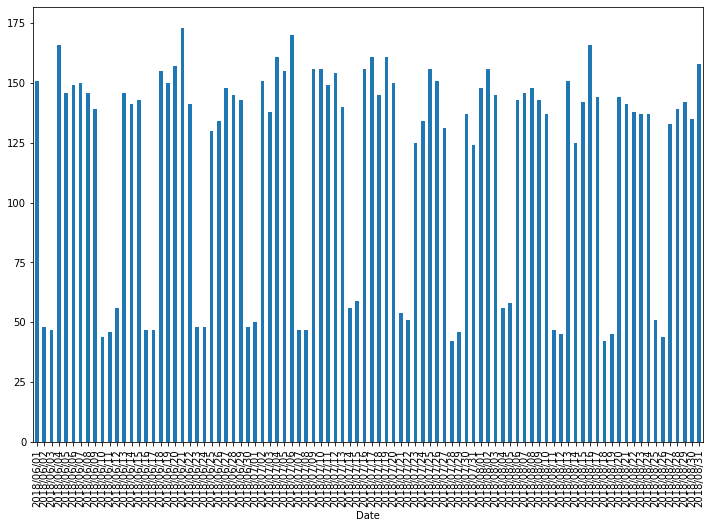

In [12]:
ax = text_summary.plot.bar(y='News')
ax.get_legend().remove()

In [13]:
words = re.findall('[A-Za-zА-ЯЁа-яё]+-[A-Za-zА-ЯЁа-яё]+|[A-Za-zА-ЯЁа-яё]+', news.News.iloc[0])
words

['Шведская',
 'YouTube-знаменитость',
 'Симона',
 'Герц',
 'Simone',
 'Giertz',
 'прославившаяся',
 'необычными',
 'изобретениями',
 'перенесла',
 'операцию',
 'Об',
 'этом',
 'рассказали',
 'ее',
 'представители',
 'в',
 'Twitter',
 'Еще',
 'в',
 'конце',
 'апреля',
 'девушка',
 'сообщила',
 'подписчикам',
 'о',
 'недуге',
 'Оказалось',
 'что',
 'у',
 'нее',
 'в',
 'мозге',
 'обнаружили',
 'доброкачественную',
 'опухоль',
 'размером',
 'с',
 'мяч',
 'для',
 'гольфа',
 'Блогер',
 'даже',
 'дала',
 'ей',
 'имя',
 'назвав',
 'новообразование',
 'Брайаном',
 'Герц',
 'сильно',
 'переживала',
 'перед',
 'хирургическим',
 'вмешательством',
 'В',
 'одном',
 'из',
 'предоперационных',
 'видео',
 'она',
 'говорила',
 'что',
 'очень',
 'напугана',
 'Однако',
 'врачи',
 'быстро',
 'удалили',
 'опухоль',
 'и',
 'спасли',
 'девушке',
 'жизнь',
 'Симона',
 'вышла',
 'из',
 'хирургии',
 'и',
 'ее',
 'врачи',
 'очень',
 'довольны',
 'тем',
 'как',
 'все',
 'прошло',
 'Она',
 'проспала',
 'достаточно'

In [15]:
from collections import Counter
wdict = Counter(words)
print(wdict)
print({w:n for w,n in wdict.items() if n>1})

Counter({'в': 5, 'Герц': 4, 'ее': 4, 'что': 3, 'из': 3, 'Симона': 2, 'Twitter': 2, 'девушка': 2, 'подписчикам': 2, 'опухоль': 2, 'с': 2, 'для': 2, 'очень': 2, 'врачи': 2, 'и': 2, 'все': 2, 'на': 2, 'Шведская': 1, 'YouTube-знаменитость': 1, 'Simone': 1, 'Giertz': 1, 'прославившаяся': 1, 'необычными': 1, 'изобретениями': 1, 'перенесла': 1, 'операцию': 1, 'Об': 1, 'этом': 1, 'рассказали': 1, 'представители': 1, 'Еще': 1, 'конце': 1, 'апреля': 1, 'сообщила': 1, 'о': 1, 'недуге': 1, 'Оказалось': 1, 'у': 1, 'нее': 1, 'мозге': 1, 'обнаружили': 1, 'доброкачественную': 1, 'размером': 1, 'мяч': 1, 'гольфа': 1, 'Блогер': 1, 'даже': 1, 'дала': 1, 'ей': 1, 'имя': 1, 'назвав': 1, 'новообразование': 1, 'Брайаном': 1, 'сильно': 1, 'переживала': 1, 'перед': 1, 'хирургическим': 1, 'вмешательством': 1, 'В': 1, 'одном': 1, 'предоперационных': 1, 'видео': 1, 'она': 1, 'говорила': 1, 'напугана': 1, 'Однако': 1, 'быстро': 1, 'удалили': 1, 'спасли': 1, 'девушке': 1, 'жизнь': 1, 'вышла': 1, 'хирургии': 1, 'дов

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
counter = CountVectorizer()
#Просим посчитать частоты слов
res= counter.fit_transform([news.News.iloc[0]])
# Разреженное представление счетчика
print(res[0,:10]) # по идентификатору можно получить частоту слова
# Можно получить индекс по слову, ...
print('герц', counter.vocabulary_.get('герц'))
# но не наоборот
print(counter.vocabulary_.get(18))
print(counter.vocabulary_)

  (0, 4)	1
  (0, 2)	1
  (0, 1)	1
  (0, 3)	2
  (0, 6)	1
  (0, 8)	1
  (0, 0)	1
  (0, 7)	1
  (0, 5)	1
  (0, 9)	1
герц 18
None
{'шведская': 123, 'youtube': 4, 'знаменитость': 37, 'симона': 104, 'герц': 18, 'simone': 2, 'giertz': 1, 'прославившаяся': 89, 'необычными': 66, 'изобретениями': 42, 'перенесла': 81, 'операцию': 76, 'об': 70, 'этом': 125, 'рассказали': 94, 'ее': 33, 'представители': 87, 'twitter': 3, 'еще': 35, 'конце': 46, 'апреля': 6, 'девушка': 24, 'сообщила': 106, 'подписчикам': 83, 'недуге': 64, 'оказалось': 74, 'что': 121, 'нее': 65, 'мозге': 54, 'обнаружили': 71, 'доброкачественную': 29, 'опухоль': 77, 'размером': 93, 'мяч': 56, 'для': 28, 'гольфа': 21, 'блогер': 8, 'даже': 22, 'дала': 23, 'ей': 34, 'имя': 43, 'назвав': 59, 'новообразование': 69, 'брайаном': 10, 'сильно': 103, 'переживала': 80, 'перед': 79, 'хирургическим': 117, 'вмешательством': 14, 'одном': 73, 'из': 38, 'предоперационных': 86, 'видео': 13, 'она': 75, 'говорила': 19, 'очень': 78, 'напугана': 63, 'однако': 

In [19]:
# ngram_range - это кортеж, который указывает длины последовательсностей, которые надо выделить. 
# Обязательны оба значения. Если хочется извлечь 4-граммы, надо передать (4,4).
counter=CountVectorizer(ngram_range=(1,2), token_pattern=r'[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+')
res=counter.fit_transform([news.News.iloc[0]])
print(counter.vocabulary_)

{'шведская': 279, 'youtube-знаменитость': 7, 'симона': 236, 'герц': 43, 'simone': 2, 'giertz': 0, 'прославившаяся': 203, 'необычными': 152, 'изобретениями': 102, 'перенесла': 187, 'операцию': 175, 'об': 162, 'этом': 283, 'рассказали': 213, 'ее': 78, 'представители': 199, 'в': 25, 'twitter': 4, 'еще': 85, 'конце': 112, 'апреля': 11, 'девушка': 58, 'сообщила': 241, 'подписчикам': 191, 'о': 160, 'недуге': 148, 'оказалось': 170, 'что': 273, 'у': 259, 'нее': 150, 'мозге': 128, 'обнаружили': 164, 'доброкачественную': 70, 'опухоль': 177, 'размером': 211, 'с': 221, 'мяч': 132, 'для': 67, 'гольфа': 52, 'блогер': 15, 'даже': 54, 'дала': 56, 'ей': 83, 'имя': 104, 'назвав': 138, 'новообразование': 158, 'брайаном': 19, 'сильно': 234, 'переживала': 185, 'перед': 183, 'хирургическим': 265, 'вмешательством': 33, 'одном': 168, 'из': 92, 'предоперационных': 197, 'видео': 31, 'она': 172, 'говорила': 48, 'очень': 180, 'напугана': 146, 'однако': 166, 'врачи': 35, 'быстро': 23, 'удалили': 261, 'и': 89, 'спа

In [20]:
#Давайте выделим пять самых частотных слов или словосочетаний из текста новости. Заодно воспользуемся тем фактом, что CountVectorizer умеет работать со списками новостей.

In [21]:
def getMostFrequentWords(text):
    counter=CountVectorizer(ngram_range=(1,2), token_pattern=r'[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+')
    res=counter.fit_transform([text])
    frq = sorted([(i, int(res[0][0,i])) for i in range(res[0].shape[1])], key = lambda x: x[1], reverse = True)[:5]
    vocab = {w:res[0,i] for w,i in counter.vocabulary_.items()}
    return [[w for w, n in counter.vocabulary_.items() if n==i][0] for i, f in frq], vocab

In [22]:
freqwords = []
vocabs = []
for i in tqdm(range(news.shape[0])):
    fw, v = getMostFrequentWords(news.News.iloc[i])
    freqwords.append(fw)
    vocabs.append(v)

100%|████████████████████████████████████████████████████████████████████████████| 10831/10831 [05:04<00:00, 35.58it/s]


In [23]:
news['Vocabular'] = vocabs
news['Freq Words'] = freqwords

In [24]:
news

,Header,Date,News,Vocabular,Freq Words
0,«Королева дерьмовых роботов» перенесла операци...,2018/06/01,Шведская YouTube-знаменитость Симона Герц (Sim...,"{'шведская': 1, 'youtube-знаменитость': 1, 'си...","[в, герц, ее, из, что]"
1,У Су-57 нашли «тайные ноу-хау»,2018/06/01,Перспективный российский многофункциональный и...,"{'перспективный': 1, 'российский': 1, 'многофу...","[су, в, не, на, ни]"
2,Знарок лишился еще одного поста,2018/06/01,Санкт-петербургский клуб Континентальной хокке...,"{'санкт-петербургский': 1, 'клуб': 2, 'контине...","[и, в, знарок, ска, тренера]"
3,СК заинтересовался задержанием аутиста московс...,2018/06/01,Следственный комитет по Москве начал проверку ...,"{'следственный': 1, 'комитет': 1, 'по': 3, 'мо...","[в, его, и, к, по]"
4,Киевляне перекрыли проспект из-за сбитого поли...,2018/06/01,Более 100 жителей Киева перекрыли проспект Гри...,"{'более': 1, 'жителей': 1, 'киева': 2, 'перекр...","[в, на, автомобиль, в котором, дтп]"
...,...,...,...,...,...
10826,Ирак закрыл воздушное пространство для российс...,2018/08/31,Ирак запретил российскому военному самолету вх...,"{'ирак': 2, 'запретил': 1, 'российскому': 1, '...","[в, над, агентство, в сирию, вероятно]"
10827,Пойманный на допинге американский спортсмен за...,2018/08/31,"Американский прыгун в длину Джеррион Лоусон, п...","{'американский': 1, 'прыгун': 1, 'в': 9, 'длин...","[в, лоусон, что, на, атлетики]"
10828,Захарченко нашли замену,2018/08/31,Временно исполняющим обязанности главы самопро...,"{'временно': 1, 'исполняющим': 1, 'обязанности...","[в, днр, захарченко, он, с]"
10829,От России потребовали отчитаться о правах геев...,2018/08/31,Пятнадцать стран-участниц Организации по безоп...,"{'пятнадцать': 1, 'стран-участниц': 1, 'органи...","[в, и, как, о, обсе]"


In [25]:
import pymorphy2 # Морфологический анализатор

In [26]:
morph = pymorphy2.MorphAnalyzer()
wordform = morph.parse('стекло')
print(wordform)

[Parse(word='стекло', tag=OpencorporaTag('NOUN,inan,neut sing,nomn'), normal_form='стекло', score=0.690476, methods_stack=((DictionaryAnalyzer(), 'стекло', 157, 0),)), Parse(word='стекло', tag=OpencorporaTag('NOUN,inan,neut sing,accs'), normal_form='стекло', score=0.285714, methods_stack=((DictionaryAnalyzer(), 'стекло', 157, 3),)), Parse(word='стекло', tag=OpencorporaTag('VERB,perf,intr neut,sing,past,indc'), normal_form='стечь', score=0.023809, methods_stack=((DictionaryAnalyzer(), 'стекло', 1015, 3),))]


In [27]:
wordform = morph.parse('пырялись')

In [28]:
wordform

[Parse(word='пырялись', tag=OpencorporaTag('VERB,impf,intr plur,past,indc'), normal_form='пыряться', score=1.0, methods_stack=((FakeDictionary(), 'пырялись', 234, 10), (KnownSuffixAnalyzer(min_word_length=4, score_multiplier=0.5), 'ялись')))]

In [29]:
import pymystem3

In [30]:
mystem = pymystem3.Mystem()
print(mystem.lemmatize('эти типы стали есть в цеху.'))

['этот', ' ', 'тип', ' ', 'становиться', ' ', 'есть', ' ', 'в', ' ', 'цех', '.', '\n']


In [32]:
print(mystem.analyze('Эти типы стали есть в цеху.'))

[{'analysis': [{'lex': 'этот', 'wt': 1, 'gr': 'APRO=(им,мн|вин,мн,неод)'}], 'text': 'Эти'}, {'text': ' '}, {'analysis': [{'lex': 'тип', 'wt': 0.8700298642, 'gr': 'S,муж,неод=(вин,мн|им,мн)'}], 'text': 'типы'}, {'text': ' '}, {'analysis': [{'lex': 'становиться', 'wt': 0.9821285244, 'gr': 'V,нп=прош,мн,изъяв,сов'}], 'text': 'стали'}, {'text': ' '}, {'analysis': [{'lex': 'есть', 'wt': 0.0492236161, 'gr': 'V,несов,пе=инф'}], 'text': 'есть'}, {'text': ' '}, {'analysis': [{'lex': 'в', 'wt': 0.9999917878, 'gr': 'PR='}], 'text': 'в'}, {'text': ' '}, {'analysis': [{'lex': 'цех', 'wt': 1, 'gr': 'S,муж,неод=(дат,ед|местн,ед)'}], 'text': 'цеху'}, {'text': '.'}, {'text': '\n'}]


In [33]:
my_res = mystem.analyze('эти типы стали есть в цеху.')

In [35]:
if 'analysis' in my_res[0].keys():
    print(my_res[0]['analysis'][0]['gr'].split('=')[0])

APRO


In [46]:
# Pymorphy
def normalizePymorphy(text):
    tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', text)
    words = []
    for t in tokens:
        pv = morph.parse(t)
        words.append(pv[0].normal_form + '_' + str(pv[0].tag.POS)) # Берем наиболее вероятную форму.
    return words    
        
# Обратите внимание, что про иностранные слова словарь ничего не знает.
normalizePymorphy(news.News.iloc[0])

['шведский_ADJF',
 'youtube-знаменитость_NOUN',
 'симона_NOUN',
 'герц_NOUN',
 'simone_None',
 'giertz_None',
 'прославиться_PRTF',
 'необычный_ADJF',
 'изобретение_NOUN',
 'перенести_VERB',
 'операция_NOUN',
 'о_PREP',
 'это_NPRO',
 'рассказать_VERB',
 'она_NPRO',
 'представитель_NOUN',
 'в_PREP',
 'twitter_None',
 'ещё_ADVB',
 'в_PREP',
 'конец_NOUN',
 'апрель_NOUN',
 'девушка_NOUN',
 'сообщить_VERB',
 'подписчик_NOUN',
 'о_PREP',
 'недуг_NOUN',
 'оказаться_VERB',
 'что_CONJ',
 'у_PREP',
 'она_NPRO',
 'в_PREP',
 'мозг_NOUN',
 'обнаружить_VERB',
 'доброкачественный_ADJF',
 'опухоль_NOUN',
 'размер_NOUN',
 'с_PREP',
 'мяч_NOUN',
 'для_PREP',
 'гольф_NOUN',
 'блогер_NOUN',
 'даже_PRCL',
 'дать_VERB',
 'она_NPRO',
 'имя_NOUN',
 'назвать_GRND',
 'новообразование_NOUN',
 'брайан_NOUN',
 'герц_NOUN',
 'сильно_ADVB',
 'переживать_VERB',
 'перед_PREP',
 'хирургический_ADJF',
 'вмешательство_NOUN',
 'в_PREP',
 'один_ADJF',
 'из_PREP',
 'предоперационный_ADJF',
 'видео_NOUN',
 'она_NPRO',
 'гов

In [47]:
def normalizePymorphy2(text):
    tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', text)
    words = []
    for t in tokens:
        pv = morph.parse(t)
        words.append(pv[0].normal_form)
    return words

In [38]:
imp_POS = ['ADJF', 'ADJS', 'NOUN', 'VERB', 'PRTF', 'PRTS', 'GRND']

def getMostFrequentWordsFiltered(text):
    
    tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', text)
    words = []
    for t in tokens:
        pv = morph.parse(t)
        if pv[0].tag.POS in imp_POS and pv[0].normal_form != 'быть':
            words.append(pv[0].normal_form)
    text = ' '.join(words)
    
    counter=CountVectorizer(ngram_range=(1,2), token_pattern=r'[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+')
    res=counter.fit_transform([text])
    frq = sorted([(i, int(res[0][0,i])) for i in range(res[0].shape[1])], key = lambda x: x[1], reverse = True)[:5]
    vocab = {w:res[0,i] for w,i in counter.vocabulary_.items()}
    return [[w for w, n in counter.vocabulary_.items() if n==i][0] for i, f in frq], vocab

In [39]:
freqwords = []
vocabs = []
for i in tqdm(range(news.shape[0])):
    fw, v = getMostFrequentWordsFiltered(news.News.iloc[i])
    freqwords.append(fw)
    vocabs.append(v)
    
news['Vocabular'] = vocabs
news['Freq Words'] = freqwords

100%|████████████████████████████████████████████████████████████████████████████| 10831/10831 [10:07<00:00, 17.83it/s]


In [40]:
def extendSummary(sum_field, data_field):
    cur_date = ''
    words = []
    text_summary[sum_field] = ['' for i in range(text_summary.shape[0])]
    for index, row in news.iterrows():
        if row.Date != cur_date:
            if cur_date != '':
                cc = Counter(words)
                # Чтобы взять пять самых частотных, сортируем и берем первые пять
                cc2 = sorted(cc.items(), key= lambda x: x[1], reverse = True)[:5]
                text_summary.loc[cur_date, sum_field] = str([c[0] for c in cc2])
                words = []
            cur_date = row.Date
        words.extend(row[data_field])
        # Последняя дата не сменилась, но закончилась. Ее тоже надо добавить.
        cc = Counter(words)
        cc2 = sorted(cc.items(), key = lambda x : x[1], reverse= True)[:5]
        text_summary.loc[cur_date, sum_field] = str([c[0] for c in cc2])
    

In [41]:
#Посчитаем слова за день
extendSummary('Keywords', 'Freq Words')

In [42]:
text_summary

,News,Keywords
Date,,
2018/06/01,151,"['год', 'который', 'россия', 'украина', 'свой']"
2018/06/02,48,"['год', 'россия', 'боец', 'украина', 'бабченко']"
2018/06/03,47,"['россия', 'год', 'сша', 'который', 'вопрос']"
2018/06/04,166,"['год', 'который', 'россия', 'время', 'украина']"
2018/06/05,146,"['год', 'который', 'россия', 'июнь', 'американ..."
...,...,...
2018/08/27,133,"['год', 'август', 'россия', 'который', 'тот']"
2018/08/28,139,"['год', 'россия', 'август', 'который', 'военный']"
2018/08/29,142,"['год', 'который', 'август', 'пенсионный', 'ро..."


In [43]:
#Посчитаем наиболее важные по TF*IDF слова и пары слов.

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
tfCounter=TfidfVectorizer(ngram_range=(1,2), token_pattern=r'[А-Яа-яЁё]+\-[А-Яа-яЁё]+|[А-Яа-яЁё]+')
tfres=tfCounter.fit_transform([' '.join(normalizePymorphy2(n)) for n in news.News] )

In [49]:
freqwords = []
for i in tqdm(range(news.shape[0])):

    tfs = [(k,tfres[i][0, tfCounter.vocabulary_.get(k)]) for k in news.Vocabular.iloc[i] 
         if k in tfCounter.vocabulary_.keys()]
    fw = [w for w, f in sorted(tfs, key = lambda x: x[1], reverse = True)[:5]]
    freqwords.append(fw)
    
news['Freq Words TFIDF'] = freqwords

100%|████████████████████████████████████████████████████████████████████████████| 10831/10831 [02:15<00:00, 79.91it/s]


In [50]:
extendSummary('Keywords TFIDF', 'Freq Words TFIDF')

In [51]:
text_summary

,News,Keywords,Keywords TFIDF
Date,,,
2018/06/01,151,"['год', 'который', 'россия', 'украина', 'свой']","['тренер', 'приложение', 'ким', 'сша', 'сбить']"
2018/06/02,48,"['год', 'россия', 'боец', 'украина', 'бабченко']","['бабченко', 'роналда', 'реал', 'сша', 'ким']"
2018/06/03,47,"['россия', 'год', 'сша', 'который', 'вопрос']","['блогер', 'мкс', 'нато', 'пошлина', 'сша']"
2018/06/04,166,"['год', 'который', 'россия', 'время', 'украина']","['ким чен', 'чен', 'ким', 'украина', 'ролик']"
2018/06/05,146,"['год', 'который', 'россия', 'июнь', 'американ...","['ядерный', 'игра', 'процент', 'газпром', 'арб..."
...,...,...,...
2018/08/27,133,"['год', 'август', 'россия', 'который', 'тот']","['сша', 'процент', 'маккейн', 'сенатор', 'крок..."
2018/08/28,139,"['год', 'россия', 'август', 'который', 'военный']","['военный', 'учение', 'часовой', 'эшелон', 'ме..."
2018/08/29,142,"['год', 'который', 'август', 'пенсионный', 'ро...","['пенсионный', 'реформа', 'пенсия', 'возраст',..."
